In [7]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser='auto')
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


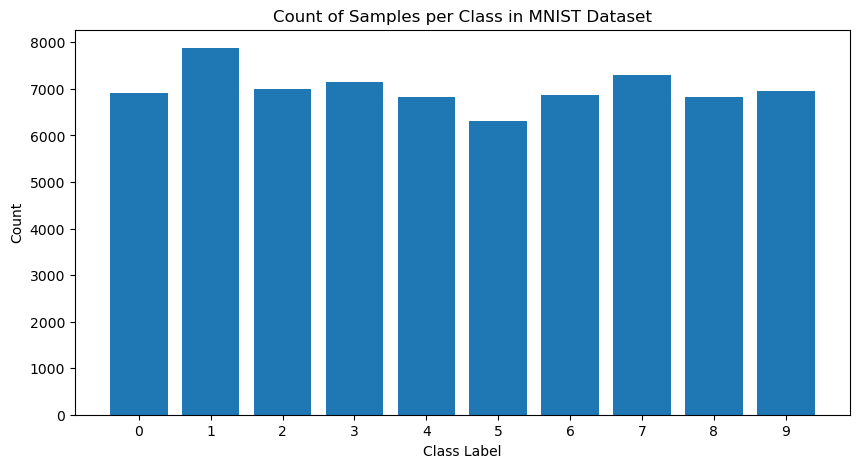

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

target = mnist.target.astype(int)

# Calculate the count/sum of each class
class_counts = np.bincount(target)

# Create a bar chart to visualize the class counts
plt.figure(figsize=(10, 5))
plt.bar(range(len(class_counts)), class_counts, tick_label=range(len(class_counts)))
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Count of Samples per Class in MNIST Dataset')
plt.show()



In [11]:
#pembagian variable independen dan dependen/ekstraksi fitur
X, y = mnist['data'].values, mnist['target'].values

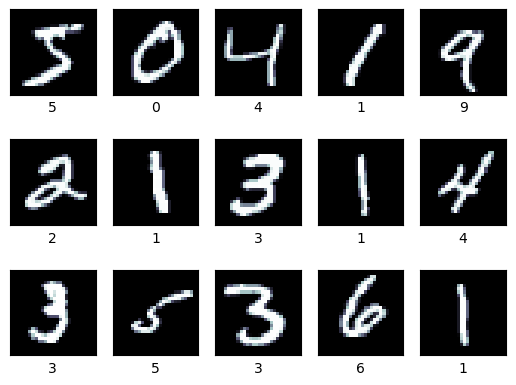

In [12]:
#Visualisasi data

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=y[i])

# Data train test 80:20

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) #data 80:20

# SVM

In [24]:
from sklearn.svm import SVC
svm_clf = SVC(decision_function_shape = 'ovo')
%time svm_clf.fit(X_train, y_train)
SVC(decision_function_shape='ovo')

CPU times: user 3min 20s, sys: 106 ms, total: 3min 20s
Wall time: 3min 21s


SVC(decision_function_shape='ovo')

In [25]:
# Prediction in training
%time training_prediction = svm_clf.predict(X_train)
print("Prediction in training:",training_prediction)
print("Actual values:",y_train)

CPU times: user 8min 21s, sys: 73.8 ms, total: 8min 21s
Wall time: 8min 24s
Prediction in training: ['1' '2' '9' ... '2' '0' '1']
Actual values: ['1', '2', '9', '3', '4', ..., '0', '5', '2', '0', '1']
Length: 56000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [26]:
# Prediction in testing
%time testing_prediction = svm_clf.predict(X_test)
print("Prediction in testing:",testing_prediction)
print("Actual values:",y_test)

CPU times: user 2min 1s, sys: 13.7 ms, total: 2min 1s
Wall time: 2min 2s
Prediction in testing: ['3' '3' '3' ... '3' '8' '3']
Actual values: ['3', '3', '3', '6', '2', ..., '5', '5', '3', '8', '3']
Length: 14000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

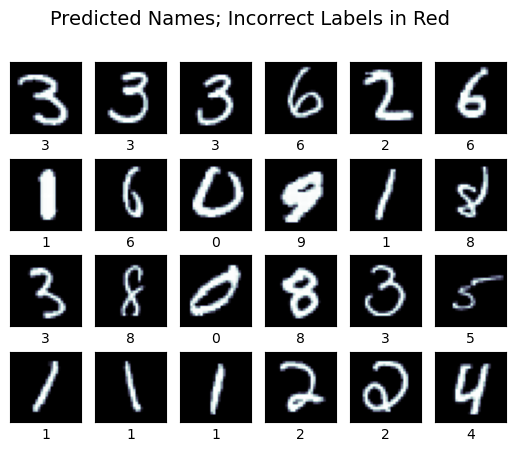

In [27]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(testing_prediction[i],
                   color='black' if testing_prediction[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [28]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
acc_train = accuracy_score(y_train, training_prediction)
acc_test = accuracy_score(y_test, testing_prediction)
print("accuracy train data:",acc_test)
print("accuracy test data:",acc_test)
# Mengevaluasi model pada data pengujian
print("\nPrediction in testing:")
print(classification_report(y_test, testing_prediction))
print("Confusion Matrix for testing:")
print(confusion_matrix(y_test, testing_prediction))

accuracy train data: 0.9802857142857143
accuracy test data: 0.9802857142857143

Prediction in testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.98      0.99      0.98      1547
           2       0.98      0.98      0.98      1405
           3       0.98      0.97      0.98      1495
           4       0.97      0.98      0.98      1310
           5       0.98      0.98      0.98      1302
           6       0.99      0.99      0.99      1374
           7       0.98      0.98      0.98      1434
           8       0.98      0.97      0.98      1334
           9       0.98      0.97      0.97      1445

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

Confusion Matrix for testing:
[[1342    1    1    0    1    1    3    0    4    1]
 [   0 1527    7    2    2    0    0    3    3    3]
 [

# Bernoulli Naive Bayes

In [29]:
from sklearn.naive_bayes import BernoulliNB  # Mengganti GaussianNB dengan BernoulliNB

naive_bayes_model = BernoulliNB()
# Melatih model menggunakan data pelatihan
%time naive_bayes_model.fit(X_train, y_train)

CPU times: user 4.3 s, sys: 83.7 ms, total: 4.38 s
Wall time: 4.4 s


BernoulliNB()

In [30]:
# Prediction in training
%time training_prediction = naive_bayes_model.predict(X_train)
print("Prediction in testing:",y_pred_nb)
print("Actual values:",training_prediction)

CPU times: user 409 ms, sys: 93.6 ms, total: 503 ms
Wall time: 412 ms
Prediction in testing: ['1' '2' '9' ... '2' '0' '1']
Actual values: ['1' '2' '9' ... '2' '0' '1']


In [31]:
# Prediction in testing
%time testing_prediction = naive_bayes_model.predict(X_test)
print("Prediction in testing:",y_pred_nb)
print("Actual values:",training_prediction)

CPU times: user 393 ms, sys: 20.8 ms, total: 414 ms
Wall time: 103 ms
Prediction in testing: ['1' '2' '9' ... '2' '0' '1']
Actual values: ['1' '2' '9' ... '2' '0' '1']


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

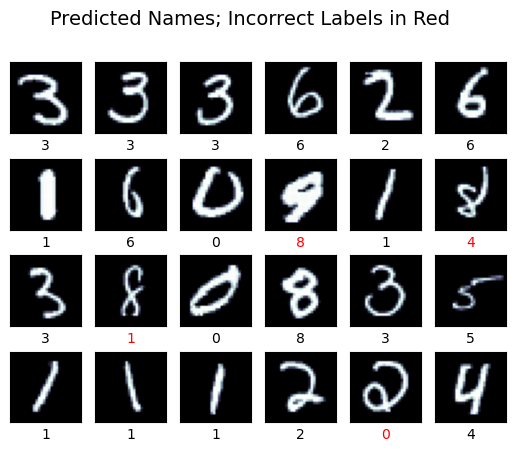

In [32]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(testing_prediction[i],
                   color='black' if testing_prediction[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [33]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
acc_train = accuracy_score(y_train, training_prediction)
acc_test = accuracy_score(y_test, testing_prediction)
print("accuracy train data:",acc_test)
print("accuracy test data:",acc_test)
# Mengevaluasi model pada data pengujian
print("\nPrediction in testing:")
print(classification_report(y_test, testing_prediction))
print("Confusion Matrix for testing:")
print(confusion_matrix(y_test, testing_prediction))

accuracy train data: 0.83
accuracy test data: 0.83

Prediction in testing:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1354
           1       0.86      0.96      0.91      1547
           2       0.87      0.83      0.85      1405
           3       0.77      0.78      0.78      1495
           4       0.79      0.80      0.80      1310
           5       0.81      0.70      0.75      1302
           6       0.89      0.91      0.90      1374
           7       0.92      0.84      0.87      1434
           8       0.76      0.77      0.76      1334
           9       0.73      0.80      0.76      1445

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000

Confusion Matrix for testing:
[[1199    0    4   10    4   63   33    0   39    2]
 [   0 1489   16    4    1   15    4    0   13    5]
 [  21   22 1173   31   30    

# Data train test 70:30

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50) #data 80:20

# SVM

In [35]:
from sklearn.svm import SVC
svm_clf = SVC(decision_function_shape = 'ovo')
%time svm_clf.fit(X_train, y_train)
SVC(decision_function_shape='ovo')

CPU times: user 2min 34s, sys: 87.2 ms, total: 2min 34s
Wall time: 2min 35s


SVC(decision_function_shape='ovo')

In [36]:
# Prediction in training
%time training_prediction = svm_clf.predict(X_train)
print("Prediction in training:",training_prediction)
print("Actual values:",y_train)

CPU times: user 6min 30s, sys: 46.4 ms, total: 6min 30s
Wall time: 6min 32s
Prediction in training: ['2' '5' '5' ... '2' '0' '1']
Actual values: ['3', '5', '5', '6', '6', ..., '0', '5', '2', '0', '1']
Length: 49000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [37]:
# Prediction in testing
%time testing_prediction = svm_clf.predict(X_test)
print("Prediction in testing:",testing_prediction)
print("Actual values:",y_test)

CPU times: user 2min 48s, sys: 30.7 ms, total: 2min 48s
Wall time: 2min 48s
Prediction in testing: ['3' '3' '3' ... '7' '7' '2']
Actual values: ['3', '3', '3', '6', '2', ..., '4', '2', '7', '7', '2']
Length: 21000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

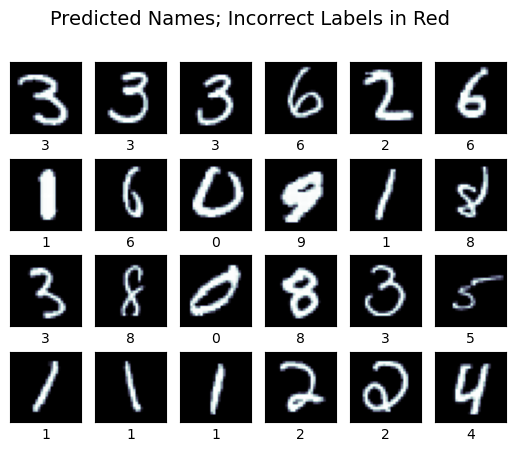

In [38]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(testing_prediction[i],
                   color='black' if testing_prediction[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [39]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
acc_train = accuracy_score(y_train, training_prediction)
acc_test = accuracy_score(y_test, testing_prediction)
print("accuracy train data:",acc_test)
print("accuracy test data:",acc_test)
# Mengevaluasi model pada data pengujian
print("\nPrediction in testing:")
print(classification_report(y_test, testing_prediction))
print("Confusion Matrix for testing:")
print(confusion_matrix(y_test, testing_prediction))

accuracy train data: 0.9775238095238096
accuracy test data: 0.9775238095238096

Prediction in testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2002
           1       0.98      0.99      0.98      2344
           2       0.97      0.98      0.98      2133
           3       0.98      0.97      0.97      2276
           4       0.97      0.98      0.98      1989
           5       0.97      0.97      0.97      1947
           6       0.98      0.99      0.99      2004
           7       0.98      0.97      0.97      2171
           8       0.98      0.97      0.97      2004
           9       0.97      0.96      0.97      2130

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000

Confusion Matrix for testing:
[[1985    1    2    1    1    2    4    0    5    1]
 [   0 2313   14    3    2    0    0    4    4    4]
 [

# Bernoulli Naive Bayes

In [40]:
from sklearn.naive_bayes import BernoulliNB  # Mengganti GaussianNB dengan BernoulliNB

naive_bayes_model = BernoulliNB()
# Melatih model menggunakan data pelatihan
%time naive_bayes_model.fit(X_train, y_train)

CPU times: user 3.44 s, sys: 50.7 ms, total: 3.49 s
Wall time: 3.51 s


BernoulliNB()

In [41]:
# Prediction in training
%time training_prediction = naive_bayes_model.predict(X_train)
print("Prediction in testing:",y_pred_nb)
print("Actual values:",training_prediction)

CPU times: user 393 ms, sys: 98.5 ms, total: 491 ms
Wall time: 372 ms
Prediction in testing: ['1' '2' '9' ... '2' '0' '1']
Actual values: ['2' '5' '5' ... '2' '0' '1']


In [42]:
# Prediction in testing
%time testing_prediction = naive_bayes_model.predict(X_test)
print("Prediction in testing:",y_pred_nb)
print("Actual values:",training_prediction)

CPU times: user 607 ms, sys: 44.6 ms, total: 652 ms
Wall time: 163 ms
Prediction in testing: ['1' '2' '9' ... '2' '0' '1']
Actual values: ['2' '5' '5' ... '2' '0' '1']


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

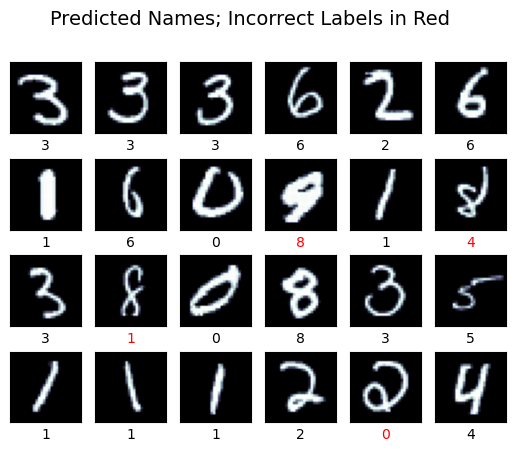

In [43]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(testing_prediction[i],
                   color='black' if testing_prediction[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [44]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
acc_train = accuracy_score(y_train, training_prediction)
acc_test = accuracy_score(y_test, testing_prediction)
print("accuracy train data:",acc_test)
print("accuracy test data:",acc_test)
# Mengevaluasi model pada data pengujian
print("\nPrediction in testing:")
print(classification_report(y_test, testing_prediction))
print("Confusion Matrix for testing:")
print(confusion_matrix(y_test, testing_prediction))

accuracy train data: 0.8312857142857143
accuracy test data: 0.8312857142857143

Prediction in testing:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      2002
           1       0.87      0.96      0.91      2344
           2       0.88      0.83      0.85      2133
           3       0.78      0.80      0.79      2276
           4       0.80      0.81      0.80      1989
           5       0.81      0.70      0.75      1947
           6       0.88      0.91      0.89      2004
           7       0.91      0.84      0.88      2171
           8       0.76      0.77      0.76      2004
           9       0.73      0.80      0.76      2130

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000

Confusion Matrix for testing:
[[1766    0    9   15    6   99   45    0   59    3]
 [   0 2240   27    7    1   26    8    0   29    6]
 [

# Data train test 80:10

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50) #data 80:20

# SVM

In [46]:
from sklearn.svm import SVC
svm_clf = SVC(decision_function_shape = 'ovo')
%time svm_clf.fit(X_train, y_train)
SVC(decision_function_shape='ovo')

CPU times: user 3min 47s, sys: 141 ms, total: 3min 47s
Wall time: 3min 48s


SVC(decision_function_shape='ovo')

In [47]:
# Prediction in training
%time training_prediction = svm_clf.predict(X_train)
print("Prediction in training:",training_prediction)
print("Actual values:",y_train)

CPU times: user 10min 7s, sys: 125 ms, total: 10min 7s
Wall time: 10min 10s
Prediction in training: ['2' '9' '4' ... '2' '0' '1']
Actual values: ['2', '9', '4', '1', '0', ..., '0', '5', '2', '0', '1']
Length: 63000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [48]:
# Prediction in testing
%time testing_prediction = svm_clf.predict(X_test)
print("Prediction in testing:",testing_prediction)
print("Actual values:",y_test)

CPU times: user 1min 5s, sys: 10.8 ms, total: 1min 5s
Wall time: 1min 5s
Prediction in testing: ['3' '3' '3' ... '8' '9' '9']
Actual values: ['3', '3', '3', '6', '2', ..., '2', '5', '8', '9', '9']
Length: 7000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

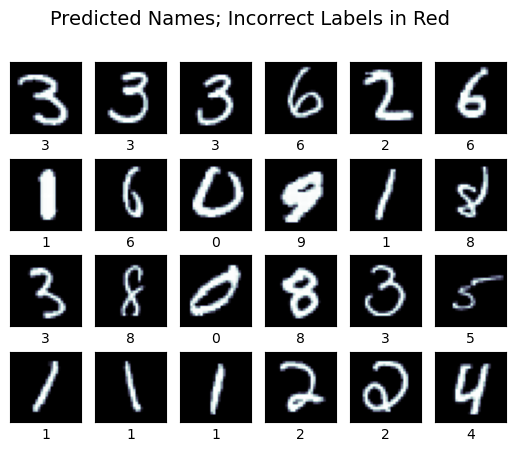

In [49]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(testing_prediction[i],
                   color='black' if testing_prediction[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [50]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
acc_train = accuracy_score(y_train, training_prediction)
acc_test = accuracy_score(y_test, testing_prediction)
print("accuracy train data:",acc_test)
print("accuracy test data:",acc_test)
# Mengevaluasi model pada data pengujian
print("\nPrediction in testing:")
print(classification_report(y_test, testing_prediction))
print("Confusion Matrix for testing:")
print(confusion_matrix(y_test, testing_prediction))

accuracy train data: 0.9794285714285714
accuracy test data: 0.9794285714285714

Prediction in testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       672
           1       0.98      0.99      0.98       806
           2       0.98      0.98      0.98       719
           3       0.98      0.97      0.98       740
           4       0.97      0.98      0.98       624
           5       0.98      0.98      0.98       643
           6       0.99      0.99      0.99       658
           7       0.97      0.97      0.97       710
           8       0.98      0.97      0.98       658
           9       0.98      0.97      0.98       770

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000

Confusion Matrix for testing:
[[668   0   0   0   1   0   0   0   2   1]
 [  0 796   3   1   2   0   0   1   1   2]
 [  2   1 702   1   3 

# Bernoulli Naive Bayes

In [51]:
from sklearn.naive_bayes import BernoulliNB  # Mengganti GaussianNB dengan BernoulliNB

naive_bayes_model = BernoulliNB()
# Melatih model menggunakan data pelatihan
%time naive_bayes_model.fit(X_train, y_train)

CPU times: user 5.1 s, sys: 49.8 ms, total: 5.15 s
Wall time: 5.17 s


BernoulliNB()

In [52]:
# Prediction in training
%time training_prediction = naive_bayes_model.predict(X_train)
print("Prediction in testing:",y_pred_nb)
print("Actual values:",training_prediction)

CPU times: user 510 ms, sys: 179 ms, total: 690 ms
Wall time: 541 ms
Prediction in testing: ['1' '2' '9' ... '2' '0' '1']
Actual values: ['2' '9' '9' ... '2' '0' '1']


In [53]:
# Prediction in testing
%time testing_prediction = naive_bayes_model.predict(X_test)
print("Prediction in testing:",y_pred_nb)
print("Actual values:",training_prediction)

CPU times: user 206 ms, sys: 14.9 ms, total: 221 ms
Wall time: 55.1 ms
Prediction in testing: ['1' '2' '9' ... '2' '0' '1']
Actual values: ['2' '9' '9' ... '2' '0' '1']


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

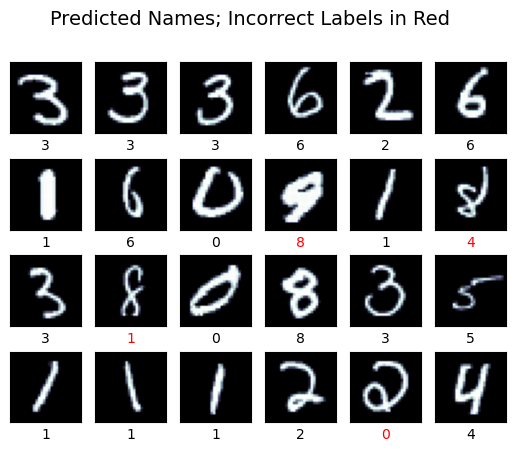

In [54]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(testing_prediction[i],
                   color='black' if testing_prediction[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [55]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
acc_train = accuracy_score(y_train, training_prediction)
acc_test = accuracy_score(y_test, testing_prediction)
print("accuracy train data:",acc_test)
print("accuracy test data:",acc_test)
# Mengevaluasi model pada data pengujian
print("\nPrediction in testing:")
print(classification_report(y_test, testing_prediction))
print("Confusion Matrix for testing:")
print(confusion_matrix(y_test, testing_prediction))

accuracy train data: 0.8228571428571428
accuracy test data: 0.8228571428571428

Prediction in testing:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       672
           1       0.86      0.97      0.91       806
           2       0.86      0.80      0.83       719
           3       0.76      0.76      0.76       740
           4       0.77      0.79      0.78       624
           5       0.81      0.69      0.74       643
           6       0.87      0.91      0.89       658
           7       0.91      0.83      0.87       710
           8       0.74      0.77      0.76       658
           9       0.74      0.80      0.77       770

    accuracy                           0.82      7000
   macro avg       0.82      0.82      0.82      7000
weighted avg       0.82      0.82      0.82      7000

Confusion Matrix for testing:
[[594   0   3   7   2  34  17   0  14   1]
 [  0 780   7   2   1   4   3   0   5   4]
 [ 15  12 578  17  18 